<a href="https://colab.research.google.com/github/Maheshkumar-GPU/retail_demand_forecasting/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the required libraries


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

data preprossing


In [12]:
#loading the data set to pandas dataframe
big_dataset = pd.read_csv("C:/Users/Asus/OneDrive/Documents/ml project datasets/Train-Set.csv")
big_dataset.head()
big_dataset.shape
big_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
#checking missing values
big_dataset.isnull().sum()
#handling missing value
big_dataset = big_dataset.fillna(0)
missing = big_dataset.isnull().sum()
print(missing)



ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64


data anaanalytics

In [14]:
# statistical meameasures of data
big_dataset.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


numerical weight

C:\Users\Asus\AppData\Local\Temp\ipykernel_13372\3980503027.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['Weight'])


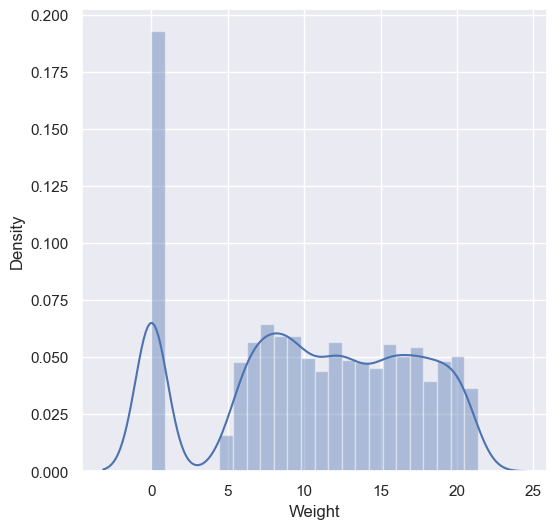

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['Weight'])
plt.show()

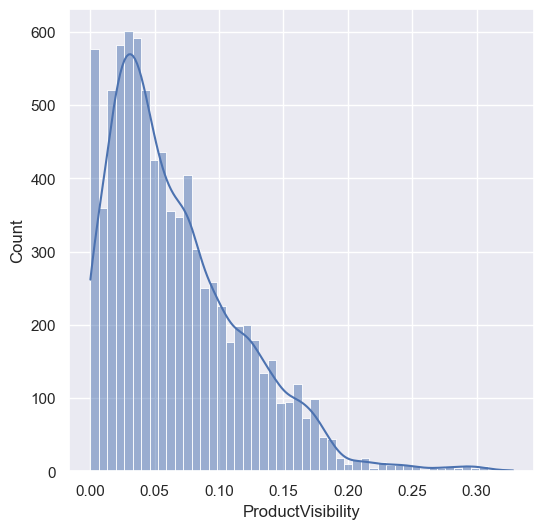

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(big_dataset['ProductVisibility'], kde=True) # Using histplot with KDE for similar functionality
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13372\1212880798.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['MRP'])


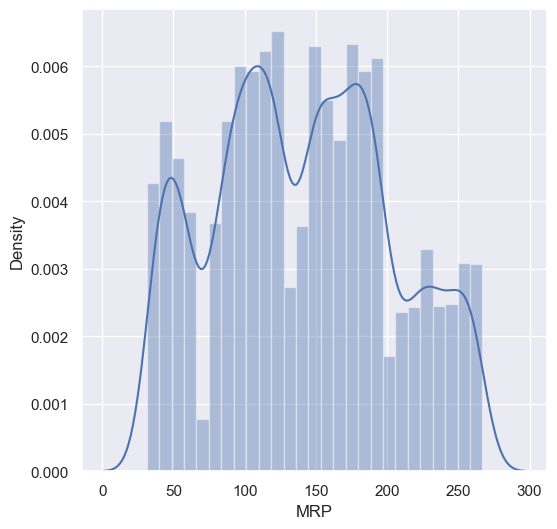

In [17]:
#  MRP distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['MRP'])
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_13372\3775014502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['EstablishmentYear'])


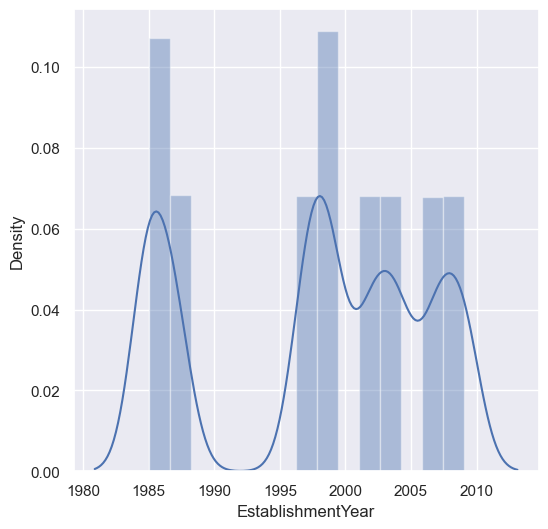

In [18]:
# EstablishmentYear  distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['EstablishmentYear'])
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_13372\3400921879.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_dataset['OutletSales'])


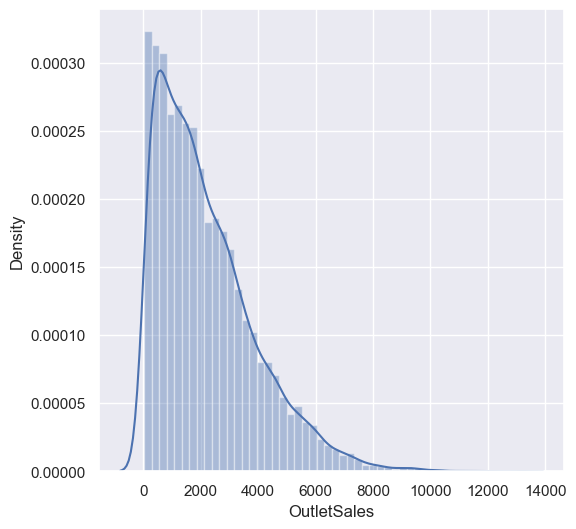

In [19]:
# OutletSales distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_dataset['OutletSales'])
plt.show()


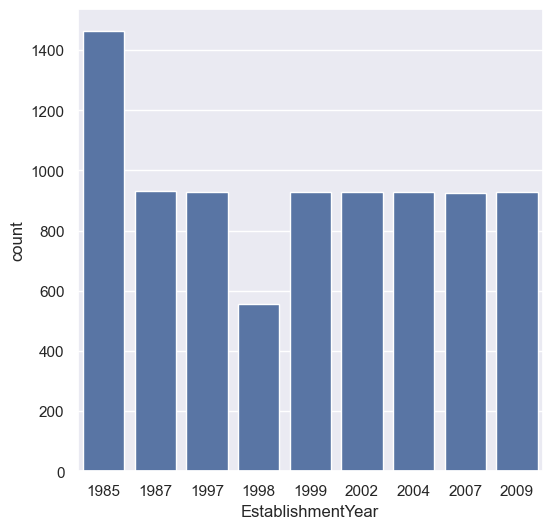

In [20]:
# EstablishmentYear count
plt.figure(figsize=(6,6))
sns.countplot(x = "EstablishmentYear",data = big_dataset)
plt.show()


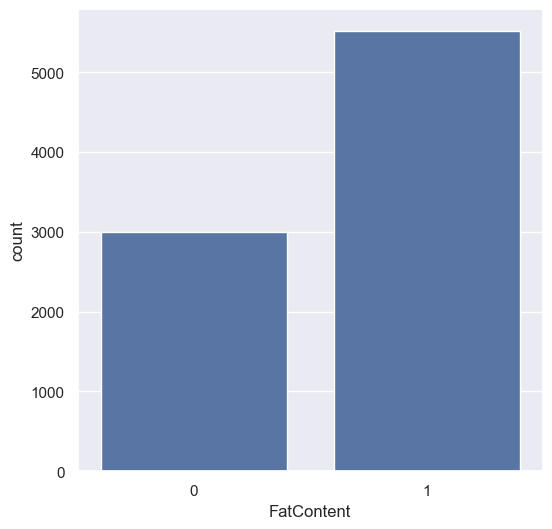

In [27]:
# FatContent column
plt.figure(figsize=(6,6))
sns.countplot(x = "FatContent",data = big_dataset)
plt.show()


In [22]:
big_dataset['FatContent'].value_counts()

FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
big_dataset.replace({'FatContent':{'Low Fat':'low fat','reg':'Regular','LF':'low fat'}},inplace=True)
big_dataset['FatContent'].value_counts()

FatContent
low fat    5517
Regular    3006
Name: count, dtype: int64

In [28]:
big_dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,0,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


label encoding


In [41]:

# See dtypes
print(big_dataset.dtypes)

# Find columns with mixed python types
mixed = big_dataset.apply(lambda s: s.map(type).nunique())
print(mixed)      # any value > 1 is a problem column

cols = ['ProductID', 'FatContent', 'ProductType',
        'OutletID', 'OutletSize', 'LocationType', 'OutletType']

for c in cols:
    big_dataset[c] = big_dataset[c].astype(str)   # unify to string

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for c in cols:
    big_dataset[c] = encoder.fit_transform(big_dataset[c])

ProductID              int64
Weight               float64
FatContent             int64
ProductVisibility    float64
ProductType            int64
MRP                  float64
OutletID               int64
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object
ProductID            1
Weight               1
FatContent           1
ProductVisibility    1
ProductType          1
MRP                  1
OutletID             1
EstablishmentYear    1
OutletSize           2
LocationType         1
OutletType           1
OutletSales          1
dtype: int64


In [42]:
encoder = LabelEncoder()
big_dataset['ProductID'] = encoder.fit_transform(big_dataset['ProductID'])
big_dataset['FatContent'] = encoder.fit_transform(big_dataset['FatContent'])
big_dataset['ProductType'] = encoder.fit_transform(big_dataset['ProductType'])
big_dataset['OutletID'] = encoder.fit_transform(big_dataset['OutletID'])
big_dataset['OutletSize'] = encoder.fit_transform(big_dataset['OutletSize'])
big_dataset['LocationType'] = encoder.fit_transform(big_dataset['LocationType'])
big_dataset['OutletType'] = encoder.fit_transform(big_dataset['OutletType'])

In [43]:
big_dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,623,9.30,1,0.016047,10,249.8092,9,1999,2,0,1,3735.1380
1,1337,5.92,0,0.019278,6,48.2692,3,2009,2,2,2,443.4228
2,1185,17.50,1,0.016760,2,141.6180,9,1999,2,0,1,2097.2700
3,138,19.20,0,0.000000,12,182.0950,0,1998,0,2,0,732.3800
4,332,8.93,1,0.000000,15,53.8614,1,1987,1,2,1,994.7052


split features and target
x = features
y = target

In [44]:
x = big_dataset.drop(columns='OutletSales',axis=1)
y = big_dataset['OutletSales']
print(x)
print(y)

      ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0           623   9.300           1           0.016047           10  249.8092   
1          1337   5.920           0           0.019278            6   48.2692   
2          1185  17.500           1           0.016760            2  141.6180   
3           138  19.200           0           0.000000           12  182.0950   
4           332   8.930           1           0.000000           15   53.8614   
...         ...     ...         ...                ...          ...       ...   
8518        861   6.865           1           0.056783            5  214.5218   
8519       1445   8.380           0           0.046982            0  108.1570   
8520        399  10.600           1           0.035186           14   85.1224   
8521       1206   7.210           0           0.145221            5  103.1332   
8522       1005  14.800           1           0.044878            6   75.4670   

      OutletID  Establishme

split training data  and testing data

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


train the  machine learning model

# using xgb regressor

In [46]:
reg = XGBRegressor()
reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

eveulating our machine learning model

In [47]:
# prediction on training data
train_data_prediction = reg.predict(x_train)
#r^2 value
r2_train = metrics.r2_score(y_train,train_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.8786957776243709


In [48]:
# prediction on testing  data
test_data_prediction = reg.predict(x_test)
#r^2 value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.5087748466826916


save ml model in pickle file

In [51]:
import pickle
with open ('model.pkl','wb') as f:
  pickle.dump(reg,f)

In [52]:
with open ('model.pkl','rb') as f:
  model = pickle.load(f)